<a href="https://colab.research.google.com/github/yh0010/NYU_Summer_Tandon_Scholar_Intro2ML/blob/main/Elaina_hw4_Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Elaina Huang

NetID: yh4310

#**Problem Set**

1a & 1b

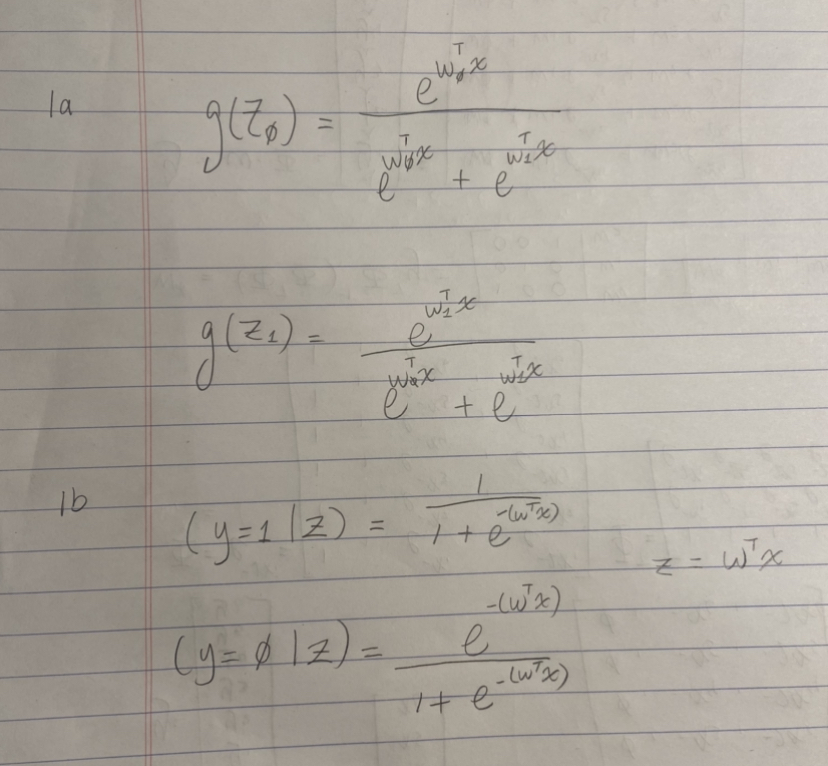

2a.

LASSO(L1), will reduce numbers of parameters by zeroing-out some coefficients, making the w sparse.

2b.

Ridge(L2), will keep all the numbers of paremeters, will penalize large coefficients, making many "small" coeffs.

2c.

Group LASSO, will shrink a group(in this case, the negative number group). Unless the whole group shrinks to 0, there might still have small negative coeffs exist, but ensure no large negative coeffs exist. Also by making positive number into a different group and assign lamba=0.

2d.

Bridge regression. For instance L4, based on the following visualization in a comparison between L2 and L4. It's clear to see that when the norm-level increases, the penalty shape is more flatten and smooth, eventually will adjust every coeffs to be similar like the previous ones.

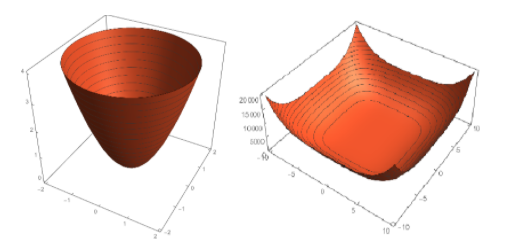

Left: L2, Right: L4

#**Colab**

##The visualization of your test image before pre-processing.


##**Good 2**

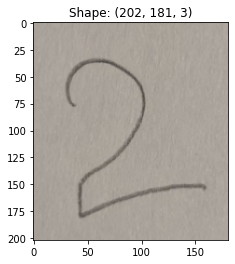

In [ ]:
from PIL import Image
 
filename = 'IMG_2475.jpg'
 
image = Image.open(filename)
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image).shape))

##**Bad 2**

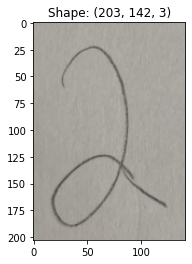

In [ ]:
from PIL import Image
 
filename = 'IMG_2477.jpg'
 
image = Image.open(filename)
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image).shape))

##The visualization of your test image after pre-processing.


##**Good 2**

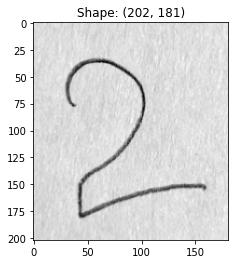

In [ ]:
# convert to grayscale image - 'L' format means each pixel is 
# represented by a single value from 0 to 255
image_bw = image.convert('L')
p = plt.imshow(np.asarray(image_bw), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw).shape))

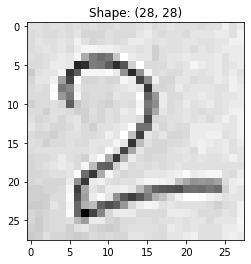

In [ ]:
# resize image 
image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
p = plt.imshow(np.asarray(image_bw_resized), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized).shape))

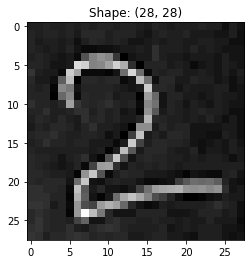

In [ ]:
# invert image, to match training data
import PIL.ImageOps    

image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
p = plt.imshow(np.asarray(image_bw_resized_inverted), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted).shape))

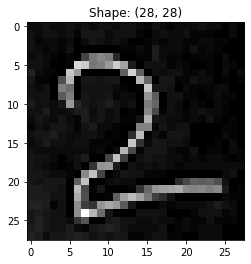

In [ ]:
# adjust contrast and scale
pixel_filter = 20 # value from 0 to 100 - may need to adjust this manually
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
p = plt.imshow(np.asarray(image_bw_resized_inverted_scaled), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted_scaled).shape))

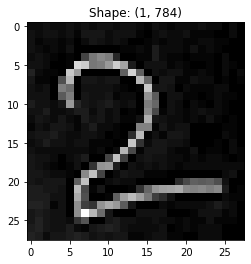

In [ ]:
# finally, reshape to (1, 784) - 1 sample, 784 features
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1,784)
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

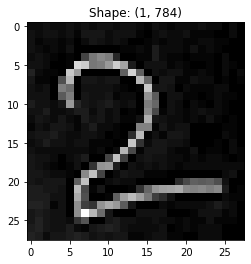

In [ ]:
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

##**Bad 2**

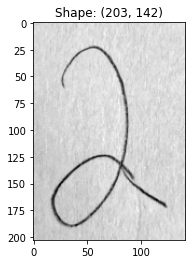

In [ ]:
# convert to grayscale image - 'L' format means each pixel is 
# represented by a single value from 0 to 255
image_bw = image.convert('L')
p = plt.imshow(np.asarray(image_bw), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw).shape))

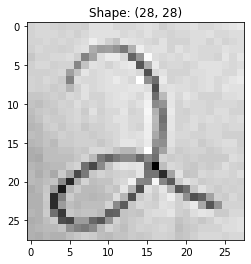

In [ ]:
# resize image 
image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
p = plt.imshow(np.asarray(image_bw_resized), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized).shape))

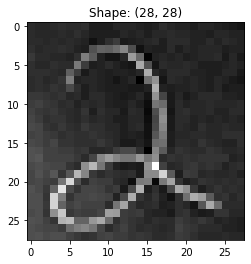

In [ ]:
# invert image, to match training data
import PIL.ImageOps    

image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
p = plt.imshow(np.asarray(image_bw_resized_inverted), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted).shape))

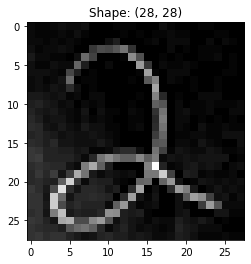

In [ ]:
# adjust contrast and scale
pixel_filter = 20 # value from 0 to 100 - may need to adjust this manually
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
p = plt.imshow(np.asarray(image_bw_resized_inverted_scaled), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted_scaled).shape))

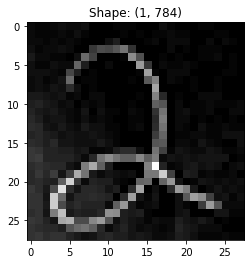

In [ ]:
# finally, reshape to (1, 784) - 1 sample, 784 features
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1,784)
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

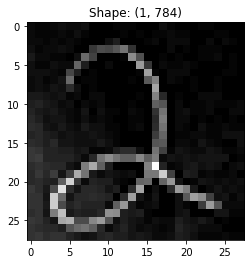

In [ ]:
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

##The bar plot showing the conditional probabilities per class for your test image.


##**Good 2**

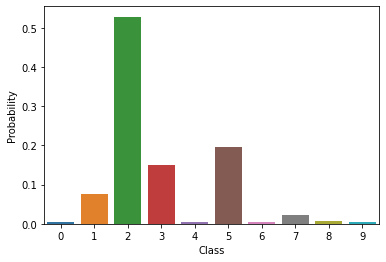

In [ ]:
test_probs = clf.predict_proba(test_sample)

sns.barplot(x=np.arange(0,10), y=test_probs.squeeze());
plt.ylabel("Probability");
plt.xlabel("Class");

##**Bad 2**

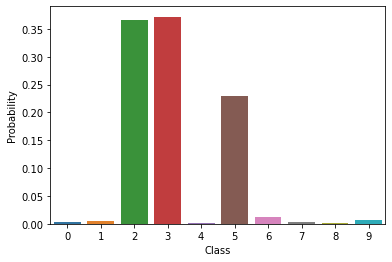

In [ ]:
test_probs = clf.predict_proba(test_sample)

sns.barplot(x=np.arange(0,10), y=test_probs.squeeze());
plt.ylabel("Probability");
plt.xlabel("Class");

##The predicted class label for your test image.


##**Good 2**

In [ ]:
test_pred = clf.predict(test_sample)
print("Predicted class is: ", test_pred)

Predicted class is:  ['2']


##**Bad 2**

In [ ]:
test_pred = clf.predict(test_sample)
print("Predicted class is: ", test_pred)

Predicted class is:  ['3']


##The figure from the “Explain the model prediction” section.


##**Good 2**

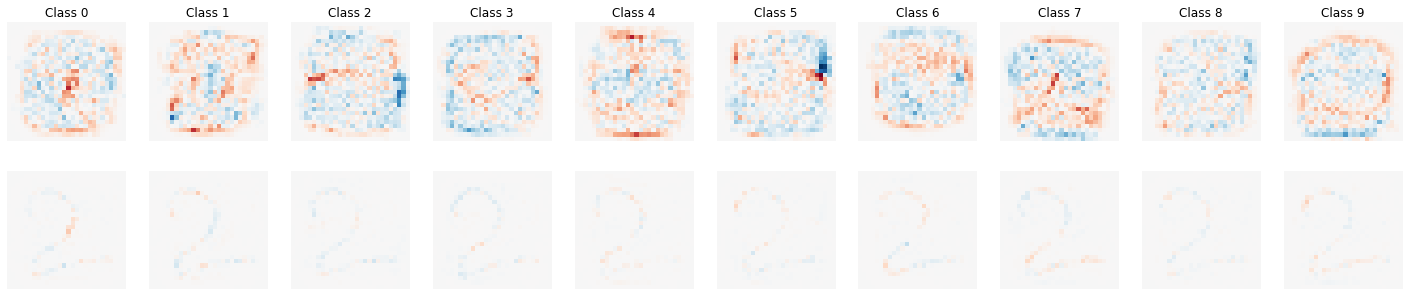

In [ ]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 5));

for i in range(nclasses):
    p = plt.subplot(2, nclasses, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.title('Class %i' % i);
    p = plt.axis('off')

for i in range(nclasses):
    p = plt.subplot(2, nclasses, nclasses + i + 1)
    p = plt.imshow(test_sample.reshape(28, 28)*clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale/2, vmax=scale/2);
    # note: you can adjust the scaling factor if necessary,
    # to make the visualization easier to understand
    p = plt.axis('off')

##**Bad 2**

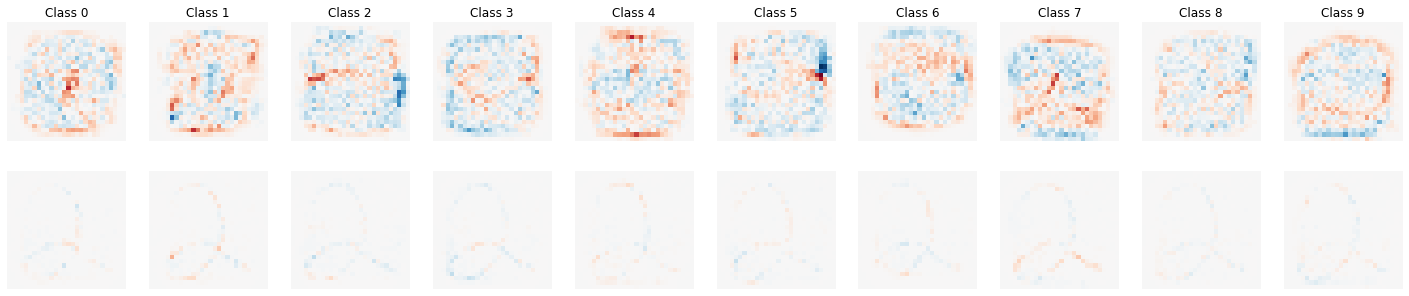

In [ ]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 5));

for i in range(nclasses):
    p = plt.subplot(2, nclasses, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.title('Class %i' % i);
    p = plt.axis('off')

for i in range(nclasses):
    p = plt.subplot(2, nclasses, nclasses + i + 1)
    p = plt.imshow(test_sample.reshape(28, 28)*clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale/2, vmax=scale/2);
    # note: you can adjust the scaling factor if necessary,
    # to make the visualization easier to understand
    p = plt.axis('off')

-   **In your own words**, list the classes for which the logistic
    regression predicted a high or moderately high probability. Using
    the figure from the “explain the model prediction” section, explain
    *why* the logistic regression estimates that these classes are very
    likely or moderately likely.
-   Explain: how did you know what changes to make to your original
    drawing to create a modified version that would get a different
    predicted class label?

I think for the "good 2", 1-pixel presents tremendous red color on the picture, the model is likely use the negativity connection to identify the possibility of my hand-drawing to be a 1. 2-pixel seems to have the most volum of blue color on the picture, despite that 3 and 5 pixels also seem correlated based on the model, the 2-pixel was chosen to be the finalized indicator. Also on the 2 and 5 pixels, these are the only two pixels have dark blue color presented. 5-pixel seemingly to have more dark blue pixels, however, also more red pixels than the 2-pixel. 

The "bad 2" is drawn very differently from the "good 2." I specifically made a circle to confuse the model, but the circled-type-2 is still a very common drawing method. In this case, model have very difficult time to differentiate it from 2 and 3, despite that only 2 and 5 pixels have the dark blue color presented. Mostly because the circle, which adds up more degrees on curliness, the model finalized the picture to be a 3. 

Other number pixel have very similar pattern on the different 2s, with 1 and 4 have leading volum of red color. It's not possible to tell from human eye based on looking at the pixels from good and bad 2. The pixel's differentness is very subtle to human eye but very different to the model.

Originally, I drew the good 2 with anguler buttom, because I assume model would look into that area for a sharp turn, and I think my assumption was correct. Because when I drew the circled-2, though the majority of the pixels fitted into model's indentifying process for a 2, the model eventually finalized a 3.